<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/10_AprendizajeNoSupervisado/ejercicios/ejercicios_solucion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

## *Instalación de la librería*

In [ ]:
!pip install pyeph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 132 kB 17.7 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 50.9 MB/s 
     |████████████████████████████████| 793 kB 51.4 MB/s 
     |████████████████████████████████| 423 kB 66.4 MB/s 
     |████████████████████████████████| 381 kB 59.1 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=14889bc694806f11b641e684e56c123451c79f15ddd5685a220d407515938f15
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: prompt-toolkit
    Found existing installatio

In [ ]:
import pyeph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.ticker import FuncFormatter
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np


## *Obtención de las bases de datos*

In [ ]:
eph = pyeph.get(data="eph", year=2021, period=2, tipo_base='hogar') 
canastas = pyeph.get(data="canastas") # canasta basica total y alimentaria
adequi = pyeph.get(data="adulto-equivalente") # adulto equivalente

Obtenido con exito: base_hogar_2021T2.zip 
CBT y CBA mas actualizada que se obtuvo: 2021-12 
Obtenido con exito: adulto_equivalente.zip 


In [ ]:
eph.head(10)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOSRWHKMLOCDEFMDB00652779,2021,2,1,1,43,N,6,176,1,...,NaN,12.0,12,0,1,0,98,0,0,0
1,TQRMNOPQSHMMLPCDEFMDB00698578,2021,2,1,1,43,N,6,272,1,...,NaN,9.0,9,430,2,1,98,0,0,0
2,TQRMNOPXXHMMLPCDEFMDB00698579,2021,2,1,1,43,N,6,97,1,...,NaN,7.0,6,138,2,0,1,0,0,0
3,TQRMNOPUYHJNKOCDEHJGH00658556,2021,2,3,1,40,S,23,137,2,...,0.0,NaN,0,136,1,0,98,0,0,0
4,TQRMNOSWSHLMKSCDEGLDF00708542,2021,2,1,1,41,N,15,154,1,...,NaN,9.0,10,182,1,0,2,0,0,0
5,TQRMNOSWUHLMKSCDEGLDF00708543,2021,2,1,1,41,N,15,289,1,...,NaN,1.0,1,333,1,0,98,0,0,0
6,TQRMNOSQVHKLKTCDEGJBF00653682,2021,2,1,1,43,S,13,767,1,...,10.0,NaN,10,769,2,0,98,0,0,0
7,TQRMNORQRHLOKTCDEGJBF00708544,2021,2,1,1,43,S,13,832,1,...,5.0,NaN,6,828,1,0,97,0,0,0
8,TQRMNOQPSHKKLNCDEGJBF00653676,2021,2,1,1,43,S,13,1232,2,...,10.0,NaN,10,1317,1,2,98,0,0,0
9,TQRMNOQQXHLLLOCDEGJBF00708545,2021,2,1,1,43,S,13,500,2,...,7.0,NaN,7,510,1,0,98,0,0,0


In [ ]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      15620 non-null  object 
 1   ANO4        15620 non-null  int64  
 2   TRIMESTRE   15620 non-null  int64  
 3   NRO_HOGAR   15620 non-null  int64  
 4   REALIZADA   15620 non-null  int64  
 5   REGION      15620 non-null  int64  
 6   MAS_500     15620 non-null  object 
 7   AGLOMERADO  15620 non-null  int64  
 8   PONDERA     15620 non-null  int64  
 9   IV1         15620 non-null  int64  
 10  IV1_ESP     21 non-null     object 
 11  IV2         15620 non-null  int64  
 12  IV3         15620 non-null  int64  
 13  IV3_ESP     25 non-null     object 
 14  IV4         15620 non-null  int64  
 15  IV5         15620 non-null  int64  
 16  IV6         15620 non-null  int64  
 17  IV7         15620 non-null  int64  
 18  IV7_ESP     11 non-null     object 
 19  IV8         15620 non-nul

In [ ]:
eph.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

Vemos columnas de interes en la documentación de la encuentas
https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_4T2021.pdf 

In [ ]:
columnas = ['REGION', 'MAS_500', 'AGLOMERADO', 'IV1', 'IV2', 'IV3', 'V4',  'IV5', 'IV6', 'IV7',
 'IV8', 'IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II4_3', 'II7', 'II8', 'II9', 
 'ITF', 'IPCF', 'IX_TOT']

In [ ]:
eph_redux = eph[columnas]

Arreglamos los datos 

In [ ]:
eph_redux['IPCF'] = eph_redux['IPCF'].apply(lambda x: x.replace(',', '.'))
eph_redux['IPCF'] = eph_redux['IPCF'].astype(float)
eph_redux['MAS_500'] = eph_redux['MAS_500'].apply(lambda x: 0 if x =='N' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
eph_redux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REGION      15620 non-null  int64  
 1   MAS_500     15620 non-null  int64  
 2   AGLOMERADO  15620 non-null  int64  
 3   IV1         15620 non-null  int64  
 4   IV2         15620 non-null  int64  
 5   IV3         15620 non-null  int64  
 6   V4          15620 non-null  int64  
 7   IV5         15620 non-null  int64  
 8   IV6         15620 non-null  int64  
 9   IV7         15620 non-null  int64  
 10  IV8         15620 non-null  int64  
 11  IV9         15620 non-null  int64  
 12  IV10        15620 non-null  int64  
 13  IV11        15620 non-null  int64  
 14  II1         15620 non-null  int64  
 15  II2         15620 non-null  int64  
 16  II3         15620 non-null  int64  
 17  II4_3       15620 non-null  int64  
 18  II7         15620 non-null  int64  
 19  II8         15620 non-nul

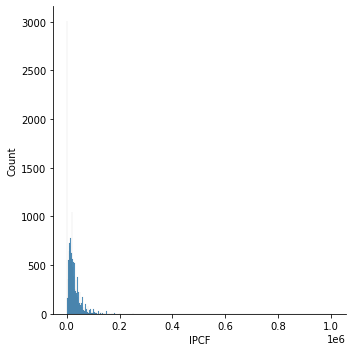

In [ ]:
sns.displot(data=eph_redux, x="IPCF")

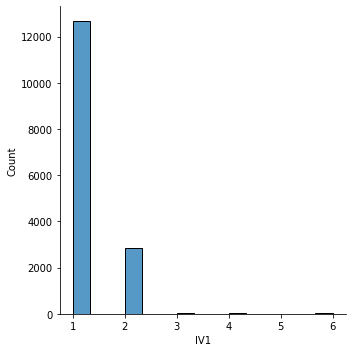

In [ ]:
sns.displot(data=eph_redux, x="IV1")

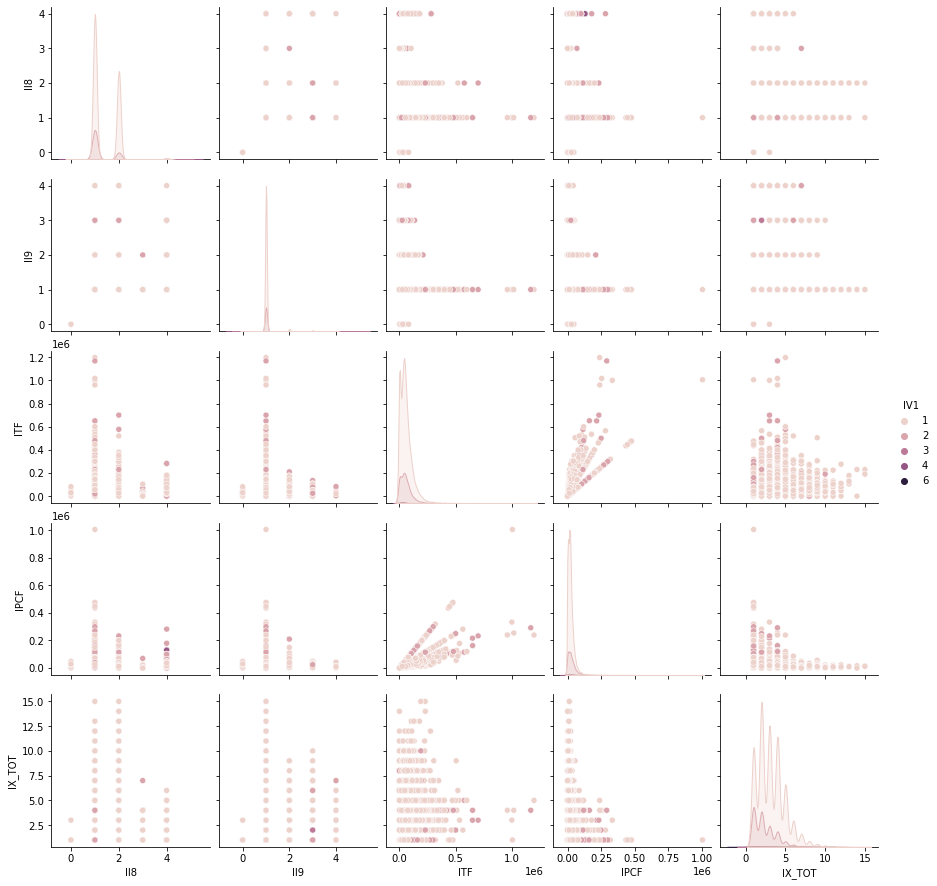

In [ ]:
sns.pairplot(eph_redux[['II8', 'II9', 'ITF', 'IPCF', 'IX_TOT', "IV1"]], hue='IV1', )


# Reducción de dimensionalidades. 

Suponiendo que tenemos conjuntos convexos podemos reducir dimensionalidad con PCA. 
Pero utilizaremos otros métodos menos estudiados 

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

In [ ]:
reducer_2d = umap.UMAP(n_components = 2)
reducer_3d = umap.UMAP(n_components = 3)
eph_redux_scaled = StandardScaler().fit_transform(eph_redux)
embedding_2d = reducer_2d.fit_transform(eph_redux_scaled)
embedding_3d = reducer_2d.fit_transform(eph_redux_scaled)
embedding_3d.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(15620, 2)

## Clustering 

clustering methods 
https://scikit-learn.org/stable/modules/clustering.html 

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_score


In [ ]:
af = AffinityPropagation(preference=-50, random_state=0).fit(embedding_2d)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(embedding_2d, labels, metric="sqeuclidean")
)

In [ ]:
clusters = [2, 3, 5, 7, 10, 13] # tomamos diferentes cantidades de clusters
iner_list = []
homo_list = []
estimators = {}
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimators[n_clusters] = estimator
    estimator.fit(embedding_2d)
    iner_list.append(estimator.inertia_)

In [ ]:
fig = px.line(x=range(len(iner_list)), y=iner_list)
fig.show()

In [ ]:
estimators[5].labels_.reshape(-1, 1).shape

(15620, 1)

In [ ]:
embedding_2d.shape

(15620, 2)

In [ ]:
data = pd.DataFrame(np.column_stack([embedding_2d, estimators[5].labels_.reshape(-1, 1)]), columns =['x','y', 'cluster'])

In [ ]:
df = px.data.iris()
fig = px.scatter(data, x="x", y="y", color="cluster")
fig.show()